## Татаринов Артем Сергеевич БЭК181

In [1]:
import numpy as np
import numpy.random
import pandas as pd
# Модули для визуализации
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
import seaborn as sns
import plotly
import plotly.express as px

plt.style.use('ggplot')

1. Парадокс инспектора.
Автобусы отходят от автостанции с 8:00 до 20:00. Первый автобус отходит ровно в 8:00. Затем интервалы между автобусами случайны, независимы и равновероятно равны либо 5-и, либо 10-и минутам.
Будем считать, что за минуту на автостанцию приходит ровно один пассажир, и все пассажиры едут
ближайшим автобусом.
Проведите 10^4
экспериментов и с их помощью:

а) [10] Постройте гистограмму количества автобусов, отошедших от автостанции за сутки. Похоже
ли визуально распределение на нормальное?

б) [10] Инспектор Тимон выбирает равновероятно один из всех автобусов отошедших от автостанции за сутки. Постройте гистограмму числа пассажиров на этом автобусе. Оцените математическое ожидание и дисперсию этого числа.

в) [10] Инспектор Пумба приходит на автостанцию в случайный момент времени, равномерный
от 8:00 до 20:00 и садится в первый пришедший автобус. Постройте гистограмму числа пассажиров на этом автобусе. Оцените математическое ожидание и дисперсию этого числа.

г) [10] Как изменятся ответы на эти вопросы, если время между автобусами будет экспоненциально со средним в 10 минут?

# Задача 1: Парадокс инспектора

### Симуляция
  функции ниже отвечают за симуляцию.
  
  на выходе получаем матрицу размера $10^4 \times 2$ где каждая строка содержит следующее: (кол-во автобусов в i-й день, список периодов ождания автобусов)
  
  так как люди приходят на остановку, по всей видимости, тоже начиная с 8.00, то первый автобус отъезжает пустой, поэтому мы,   наверное, его в расчет брать не будем
  
  Кроме того, так как уже случалось при симуляции такое, что *в пункте (в)*: Пумба выбирал момент времени 19.58, а последний автобус уезжал в 19.55 (т.е. выпавший по воле судьбы интервал прибытия следующего автобуса был равен 10 минутам, что выходит за рамки отведенного на рейсы времени), было принято решение добавить обязательный автобус в 20.00


In [2]:
def a_day(): 
    ''' 1 экспермент, интервалы 5 и 10 минут '''
    v = np.random.binomial(n=1, p=0.5, size=200) * 5 + 5 # создаем много рандомных интервалов (вообще, должно хватить 144)
    v_cumsum = np.cumsum(v)
    res = list(v[v_cumsum <= 720]) # отберем так, чтобы уложиться в 12*60=720 минут
    a = sum(res)
    if a < 720:
        res.append(720 - a) # добавим обязательный в 20.00
    return np.array(res)


def g_day():
    v = np.random.exponential(scale=10, size=200) # все аналогично
    v_cumsum = np.cumsum(v)
    res = list(v[v_cumsum <= 720])
    a = sum(res)
    if a < 720:
        res.append(720 - a)
    return np.array(res)


def experiment(fun):
    """ Получаем матрицу в 10^4 строк, где каждая строка: (кол-во авт., вектор интервалов) """
    ans = []
    for i in range(10**4):
        np.random.seed(i + 220) # мб не оч корректно здесь с зерном, но нужный результат достигается
        x = fun()
        ans.append((x.shape[0], x))
    return np.array(ans)

### "Случайно" выбираем автобусы

Исходя из условия, кол-во пассажиров автобуса равно времени ожидания. Так как кол-во пассажиров - число целое (не полтора землекопа все-таки), в случае дробного времени стоило бы округлять с помощью **round()**, к примеру, но на результат это существенно не повлияет 

In [3]:
def b_sample(data):
    """Тимон равновероятно выбирает автобус"""
    sample = []
    for i in range(data.shape[0]):
        np.random.seed(i)
        sample.append(np.random.choice(data[i, 1], 1)[0])
    return np.array(sample)


def v_sample(data):
    """Пумба приходит в случайный момент времени"""
    n = data.shape[0]
    data = data[:, 1]
    sample = []
    np.random.seed(15)
    time = list(np.random.uniform(low=0, high=720, size=n)) # случ. время в минутах (от 8.00 до 20.00)
    for i in range(n):
        a = time[i]              # берем значение равномерной с.в.
        vec = data[i]            # соотв. строку 
        cs = np.cumsum(vec)      # находим время отправления авт. в минутах (8.00 - точка отсчета)
        pas_num = vec[cs > a][0] # смотрим, на время отправления какого-автобуса Пумба попадает
        sample.append(pas_num)   # добавляем кол-во пассажирова
    return np.array(sample)

### Строим графики и проч.

In [4]:
def bus_plt_hist(data, bins=None):
    plt.figure(figsize=(10, 7))
    plt.hist(data[:, 0], color='r', bins=bins)
    plt.xlabel('Кол-во автобусов в день')
    plt.ylabel('Частотность')
    plt.title('Гистограмма кол-ва автобусов в день (за 10^4 дней)')
    plt.annotate('Похоже на нормальное', xy=(85, 400))
    plt.show()
    pass


def punkt_bv(sample, comm, bins=None):
    # гистограмма пассажиров в автобусе
    plt.figure(figsize = (10, 7))
    plt.hist(sample, color='blueviolet', bins=bins)
    plt.xlabel('Число пассажиров')
    plt.ylabel('Кол-во случаев')
    plt.title('Число пассажиров {}.'.format(comm))
    plt.show()
    # матожидание + дисперсия
    print('Математическое ожидание числа пассажиров равно', sample.mean())
    print('Дисперсия числа пассажиров равна', np.var(sample))
    pass

## (a)

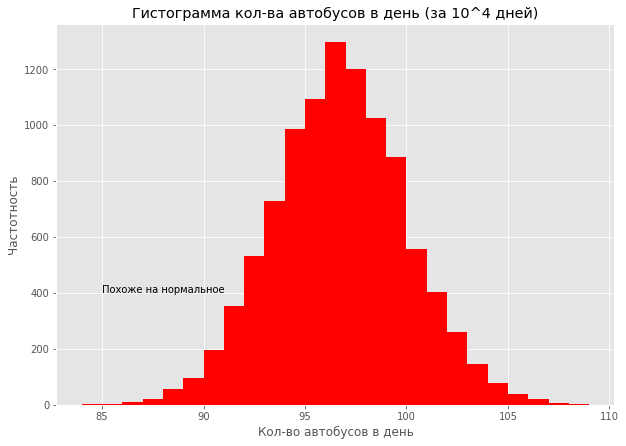

In [5]:
this_data = experiment(a_day)
bus_plt_hist(this_data, 25)

## (б) + (в)

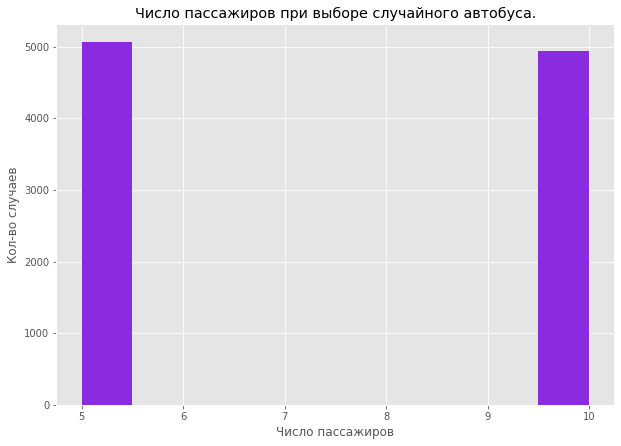

Математическое ожидание числа пассажиров равно 7.471
Дисперсия числа пассажиров равна 6.249159000000001


In [6]:
tim_sample = b_sample(this_data)
punkt_bv(tim_sample, 'при выборе случайного автобуса')

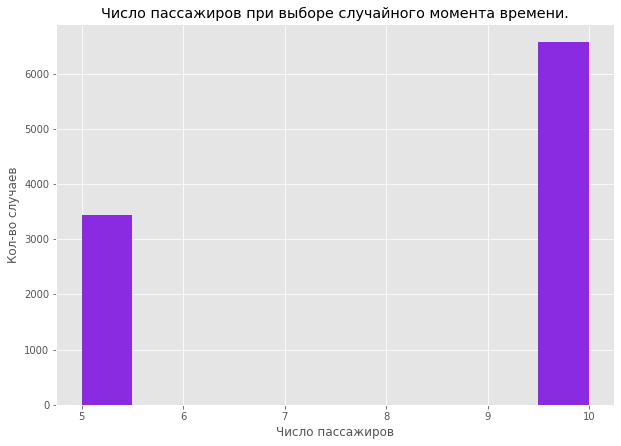

Математическое ожидание числа пассажиров равно 8.282
Дисперсия числа пассажиров равна 5.638476


In [7]:
pum_sample = v_sample(this_data)
punkt_bv(pum_sample, 'при выборе случайного момента времени')

Как можем заметить, при случайном выборе автобуса, среднее кол-во пассажиров (оно же - время ожидания) приближено к теоретическому $7.471 \approx \mathbb{E}[Pass.num.] = 0.5 \cdot 10 + 0.5 \cdot 5 = 7.5$

Если просто приходить на остановку в случайное время, то вероятность попасть в период более длительного ожидания больше, поэтому и среднее будет завышено: $8.282$

Парадокс инспектора, по всей видимости, успешно проиллюстрирован

## (г)

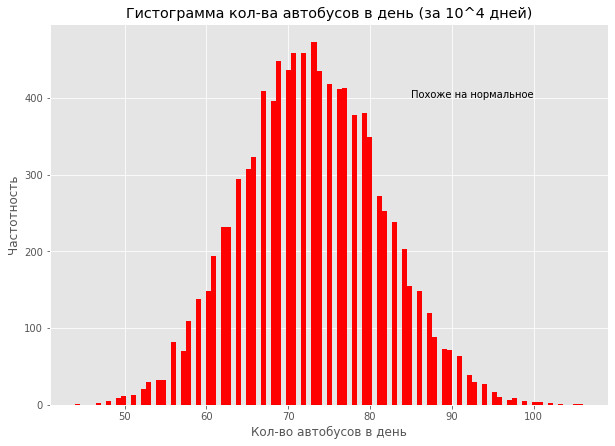

In [8]:
new_data = experiment(g_day)
# a)
bus_plt_hist(new_data, 101)

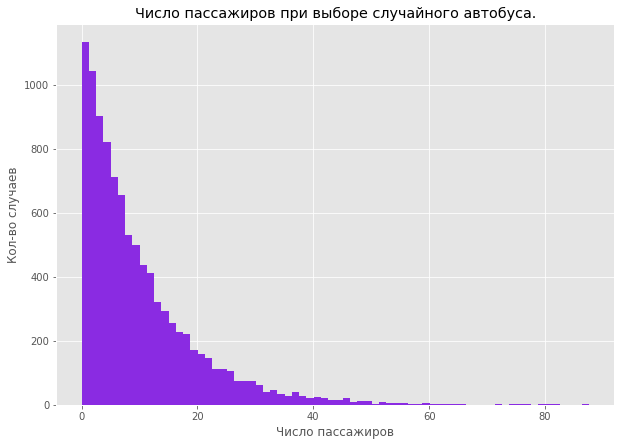

Математическое ожидание числа пассажиров равно 10.031877964347109
Дисперсия числа пассажиров равна 99.51683552754737


In [9]:
# б)
tim2 = b_sample(new_data)
punkt_bv(tim2, 'при выборе случайного автобуса', 70)

Найденные значения так же близки к теор. 10 и 100, а гистограмма явно намекает на эксп. распределение (как собственно и есть)

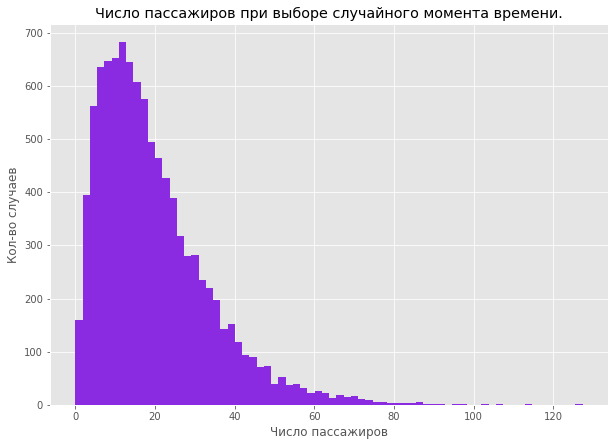

Математическое ожидание числа пассажиров равно 19.650976426111452
Дисперсия числа пассажиров равна 194.0185402788224


In [10]:
# в)
pum2 = v_sample(new_data)
punkt_bv(pum2, 'при выборе случайного момента времени', 70)

Ситуация аналогична. Однако в данном случае мы получили больший разброс как среднего, так и дисперсии **(в 2 раза больше!)**, а распределение скорее напоминает Пуассоновское 

# 2. Парадокс Паррондо

Парадокс Хуана Мануэля Родригеса Паррондо.

У Атоса, Портоса и Арамиса по 1000 франков. 

Атос постоянно ходит в казино А, где каждый раз выигрывает один франк с вероятностью $0.49$ и проигрывает 
один франк с вероятностью $0.51$.

Портос ходит в казино Б, где ситуация интереснее :) 
Если богатство посетителя кратно трём, то посетитель выигрывает франк с вероятностью $0.09$ 
и проигрывает один франк с вероятностью $0.91$. 
Если богатство посетителя не кратно трём, то посетитель выигрывает франк с вероятностью $0.74$ 
и проигрывает один франк с вероятностью $0.26$. 

Арамис каждый раз выбирает казино А или казино Б равновероятно. 

Проведите $10^4$ симуляций эволюции благосостояния Атоса, Портоса и Арамиса.
Каждая симуляция предусматривает $1000$ посещений казино. 
Все три игрока все деньги носят с собой и ни на что не тратят :)


1) [10] Постройте на графике $10$ случайных траекторий изменений богатства Атоса, по горизонтали — 
    номер посещени казино, по вертикали — богатство.
    На том же графике постройте усреднённую по всем экспериментам тракторию изменения богатства.
    
2) [10] Постройте на графике $10$ случайных траекторий изменений богатства Портоса, по горизонтали — 
    номер посещени казино, по вертикали — богатство. 
    На том же графике постройте усреднённую по всем экспериментам тракторию изменения богатства.

3) [10] Постройте на графике $10$ случайных траекторий изменений богатства Арамиса, по горизонтали — 
    номер посещени казино, по вертикали — богатство. 
    На том же графике постройте усреднённую по всем экспериментам тракторию изменения богатства.


In [11]:
def task(sim, name):
    """ Будет строить графики по заданию """
    np.random.seed(100)
    vec = list(np.random.choice(10000, 10)) 
    sample = sim[vec, :]
    data = pd.DataFrame(sample.transpose())
    fig = plt.figure(figsize=(13, 7))
    x = data.index
    for i in range(10):
        plt.plot(x, data[i], linewidth = 0.7)
    plt.xlabel('Номер посещения казино')
    plt.ylabel('Финансовое положение {}а (в франках)'.format(name))
    plt.title('Как {} в казино ходил'.format(name))
    plt.xlim(0, 1000)
    # добавим среднее
    m = sim.mean(axis=0)
    plt.plot(x, m, label='в среднем', linewidth = 2)
    plt.legend()
    plt.show()
    pass

### (1)

In [12]:
np.random.seed(100)
m = np.random.binomial(n=1, p=0.49, size=(10000, 1000)) * 2 - 1
Atos_sim = np.cumsum(m, axis=1) + 1000

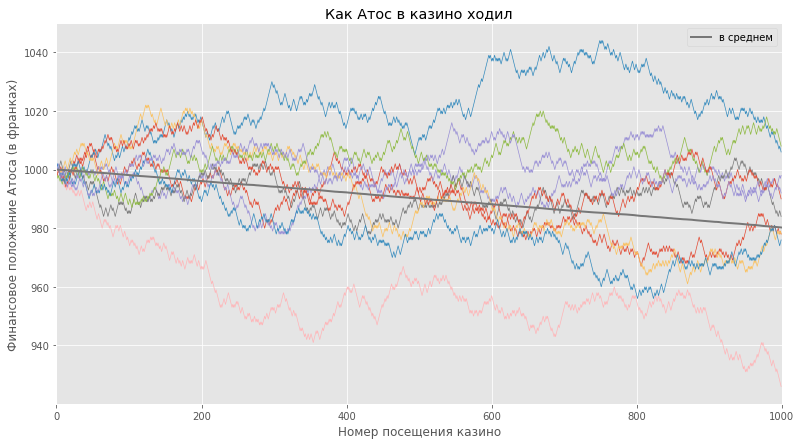

In [13]:
task(Atos_sim, 'Aтос')

### (2)

In [14]:
sim = []
for i in range(10**4):
    np.random.seed(i + 2)
    v1 = np.random.binomial(n=1, p=0.09, size=1000) * 2 - 1
    v2 = np.random.binomial(n=1, p=0.74, size=1000) * 2 - 1
    ans = [1000]
    for k in range(1000):
        a = ans[-1]
        if a % 3 == 0:
            ans.append(a + v1[k])
        else: 
            ans.append(a + v2[k])
    sim.append(ans)
portos = np.array(sim)

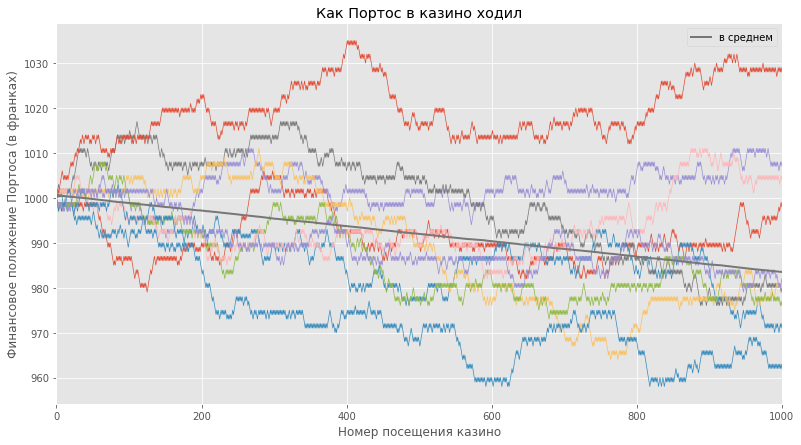

In [15]:
task(portos, 'Портос')

### (3)

In [16]:
sim3 = []
for i in range(10**4):
    np.random.seed(i + 4)
    choice = np.random.binomial(n=1, p=0.5, size=1000)
    at = np.random.binomial(n=1, p=0.49, size=1000) * 2 - 1
    p1 = np.random.binomial(n=1, p=0.09, size=1000) * 2 - 1
    p2 = np.random.binomial(n=1, p=0.74, size=1000) * 2 - 1
    ans = [1000]
    for k in range(1000):
        a = ans[-1]
        if choice[k]:
            if a % 3 == 0:
                ans.append(a + p1[k])
            else: 
                ans.append(a + p2[k])
        else:
            ans.append(a + at[k])
    sim3.append(ans)
Aramys_sim = np.array(sim3)

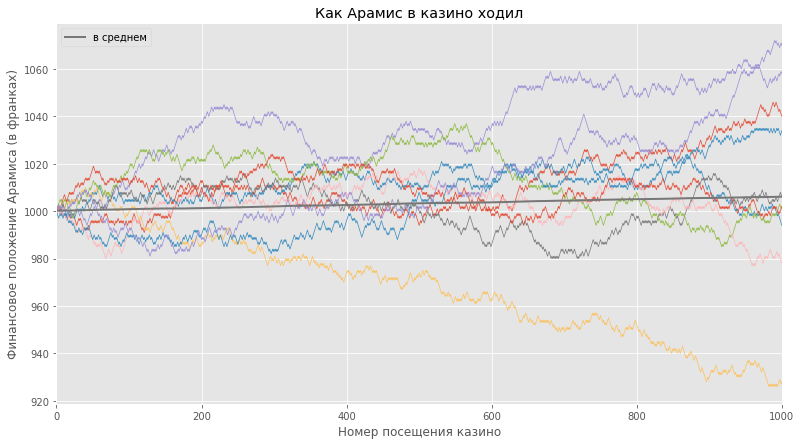

In [17]:
task(Aramys_sim, 'Арамис')

Арамис, комбинируя в среднем проигрышные стратегии Атоса и Портоса, оказывается, в среднем, в небольшом плюсе. Вот, собственно, и парадокс. Такое часто случается, когда вероятность выигрыша зависит от капитала :).

# 3. Парадокс Берксона

Предположим, что результаты ЕГЭ школьников по русскому и математике независимы и хорошо
аппроксимируются нормальным распределением с ожиданием 60 и стандартным отклонением 10.
УШЭ (Урюпинская Школа Экономики) ныне престижна и забирает себе всех школьников набравших
более n баллов в сумме по русскому и математике.

Для каждого n от 80 до 160 с шагом 5 случайно создайте $10^4$ школьников и поделите их на прошедших и не прошедших в УШЭ.

а) [10] Постройте график числа прошедших в УШЭ в зависимости от n.

б) [10] Постройте график выборочной корреляции между результатами по русскому и математике
в зависимости от n среди прошедших в УШЭ.

в) [10] Постройте график выборочной корреляции между результатами по русскому и математике
в зависимости от n среди не прошедших в УШЭ.

### (а)

In [18]:
np.random.seed(100)
myList = {}
for n in range(80, 161, 5):
    pupils = np.random.normal(60, 10, size=10**4) + np.random.normal(60, 10, size=10**4)
    students = pupils[pupils > n]
    myList[n] = students.shape[0]

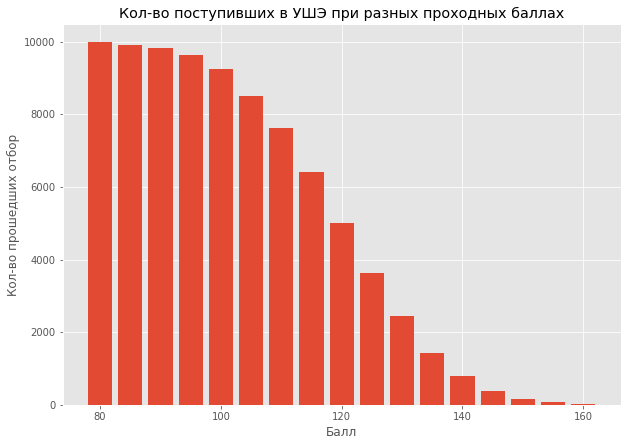

In [19]:
df = pd.DataFrame(myList, index=[0])
all_colors = list(plt.cm.colors.cnames.keys())
c = np.random.choice(all_colors, df.columns.shape[0])
plt.figure(figsize = (10, 7))
plt.bar(df.columns, df.loc[0], width = 4)
plt.xlabel('Балл')
plt.ylabel('Кол-во прошедших отбор')
plt.title('Кол-во поступивших в УШЭ при разных проходных баллах')
plt.show()

### (б), (в)



In [20]:
colvo = 10**4
yes_corr = {}
no_corr = {}
for n in range(80, 161, 5):
    np.random.seed(n + 1)
    rus = np.random.normal(60, 10, size=colvo)
    mat = np.random.normal(60, 10, size=colvo)
    total = rus + mat
    matrix = np.array([rus, mat, total]).transpose()
    entered = matrix[matrix[:, 2] > n, :]
    corr1 = np.corrcoef(entered[:,0], entered[:,1])[1, 0]
    nope = matrix[matrix[:, 2] < n, :]
    corr2 = np.corrcoef(nope[:,0], nope[:,1])[1, 0]
    yes_corr[n] = corr1
    no_corr[n] = corr2

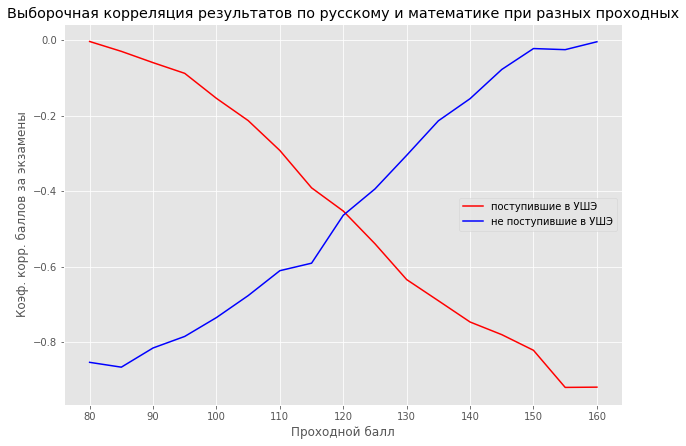

In [21]:
yes_df = pd.DataFrame(yes_corr, index=[0])
no_df = pd.DataFrame(no_corr, index=[0])
fig, ax = plt.subplots()
ax.plot(yes_df.columns, yes_df.loc[0], color = 'red', label='поступившие в УШЭ')
ax.plot(no_df.columns, no_df.loc[0], color='blue', label='не поступившие в УШЭ')
ax.set_xlabel('Проходной балл')
ax.set_ylabel('Коэф. корр. баллов за экзамены')
ax.set_title('Выборочная корреляция результатов по русскому и математике при разных проходных')
fig.set_size_inches(10, 7)
plt.legend()
plt.show()